<a href="https://play-ashburn.neurodesk.org/v2/gh/neurodesk/example-notebooks/main?labpath=/home/jovyan/examples/example-notebooks/books/functional_imaging/fmriprep_example.ipynb" target="_parent"><img src="https://img.shields.io/badge/launch-binder-579aca.svg?logo=" alt="Open In Binder"/>  </a>
<a href="https://colab.research.google.com/github/NeuroDesk/example-notebooks/blob/main/books/functional_imaging/fmriprep_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>  </a>

# Fmriprep Example

Author: Steffen Bollmann

## Setup Neurodesk

In [8]:
%%capture
import os
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
  os.environ["LD_PRELOAD"] = "";
  os.environ["APPTAINER_BINDPATH"] = "/content,/tmp,/cvmfs"
  os.environ["MPLCONFIGDIR"] = "/content/matplotlib-mpldir"
  os.environ["LMOD_CMD"] = "/usr/share/lmod/lmod/libexec/lmod"

  !curl -J -O https://raw.githubusercontent.com/NeuroDesk/neurocommand/main/googlecolab_setup.sh
  !chmod +x googlecolab_setup.sh
  !./googlecolab_setup.sh

  os.environ["MODULEPATH"] = ':'.join(map(str, list(map(lambda x: os.path.join(os.path.abspath('/cvmfs/neurodesk.ardc.edu.au/neurodesk-modules/'), x),os.listdir('/cvmfs/neurodesk.ardc.edu.au/neurodesk-modules/')))))


In [9]:
# Output CPU information:
!cat /proc/cpuinfo | grep 'vendor' | uniq
!cat /proc/cpuinfo | grep 'model name' | uniq

vendor_id	: AuthenticAMD
model name	: AMD EPYC 7742 64-Core Processor


## Run fMRIprep

In [10]:
# load fmriprep
import lmod
import os
await lmod.load('fmriprep/22.1.1')
await lmod.list()

['fmriprep/22.1.1']

In [11]:
# Request a freesurfer license and store it in your homedirectory. This is just an exampe - please replace with your license id:
!echo "Steffen.Bollmann@cai.uq.edu.au" > ~/.license
!echo "21029" >> ~/.license
!echo "*Cqyn12sqTCxo" >> ~/.license
!echo "FSxgcvGkNR59Y" >> ~/.license

In [12]:
# download data
!datalad install https://github.com/OpenNeuroDatasets/ds000102.git
!cd ds000102 && datalad get sub-08

In [13]:
!export ITK_GLOBAL_DEFAULT_NUMBER_OF_THREADS=2 && export MPLCONFIGDIR=~/matplotlib-mpldir && fmriprep ds000102/ content/ participant --fs-license-file ~/.license --output-spaces T1w MNI152NLin2009cAsym fsaverage fsnative --participant-label 08 --nprocs $ITK_GLOBAL_DEFAULT_NUMBER_OF_THREADS --mem 10000 --skip_bids_validation -v

You are using fMRIPrep-22.1.1, and a newer version of fMRIPrep is available: 23.1.4.
Please check out our documentation about how and when to upgrade:
https://fmriprep.readthedocs.io/en/latest/faq.html#upgrading
--topup-max-vols input is no longer used and the flag will be removed in a future release.
231218-22:04:02,411 cli INFO:
	 Telemetry system to collect crashes and errors is enabled - thanks for your feedback!. Use option ``--notrack`` to opt out.
231218-22:04:18,834 nipype.workflow IMPORTANT:
	 Running fMRIPrep version 22.1.1

         License NOTICE ##################################################
         fMRIPrep 22.1.1
         Copyright 2022 The NiPreps Developers.
         
         This product includes software developed by
         the NiPreps Community (https://nipreps.org/).
         
         Portions of this software were developed at the Department of
         Psychology at Stanford University, Stanford, CA, US.
         
         This software redistributes the

## fMRIprep Results

The full report is in content/sub-08.html but here a few items from the report:

### T1 and brain mask
Template T1-weighted image (if several T1w images were found), with contours delineating the detected brain mask and brain tissue segmentations.

In [25]:
from IPython.core.display import SVG
SVG(filename='content/sub-08/figures/sub-08_dseg.svg')

### Surfaces
Surfaces (white and pial) reconstructed with FreeSurfer (recon-all) overlaid on the participant's T1w template.

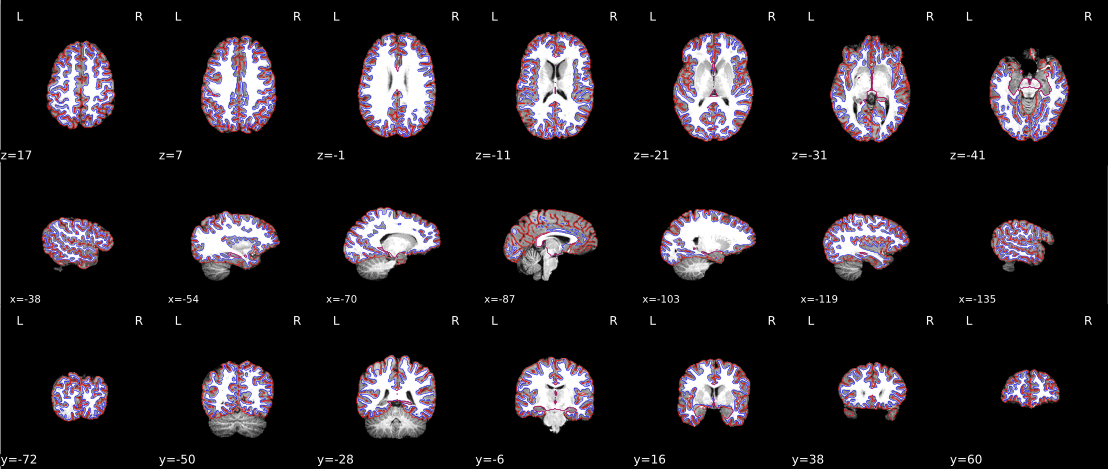

In [26]:
from IPython.core.display import SVG
SVG(filename='content/sub-08/figures/sub-08_desc-reconall_T1w.svg')

### EPI-space to T1-space
bbregister was used to generate transformations from EPI-space to T1w-space. Note that Nearest Neighbor interpolation is used in the reportlets in order to highlight potential spin-history and other artifacts, whereas final images are resampled using Lanczos interpolation.

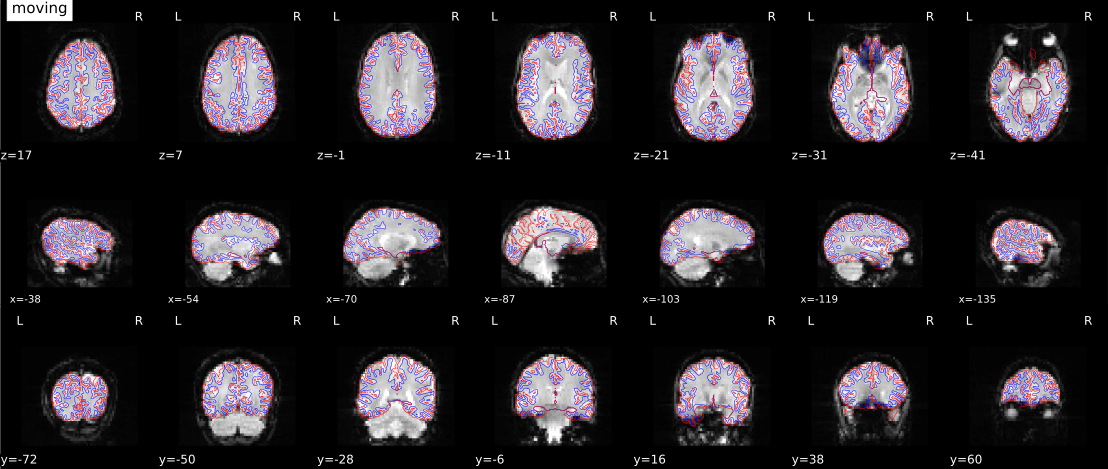

In [27]:
from IPython.core.display import SVG
SVG(filename='content/sub-08/figures/sub-08_task-flanker_run-1_desc-bbregister_bold.svg')

### Bold Summary
Summary statistics are plotted, which may reveal trends or artifacts in the BOLD data. Global signals calculated within the whole-brain (GS), within the white-matter (WM) and within cerebro-spinal fluid (CSF) show the mean BOLD signal in their corresponding masks. DVARS and FD show the standardized DVARS and framewise-displacement measures for each time point.
A carpet plot shows the time series for all voxels within the brain mask, or if --cifti-output was enabled, all grayordinates. Voxels are grouped into cortical (dark/light blue), and subcortical (orange) gray matter, cerebellum (green) and white matter and CSF (red), indicated by the color map on the left-hand side.

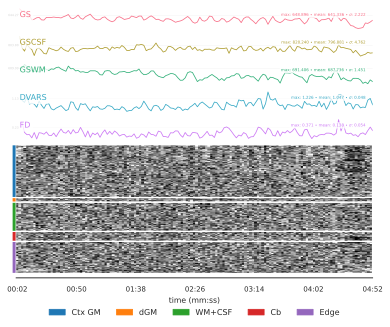

In [28]:
from IPython.core.display import SVG
SVG(filename='content/sub-08/figures/sub-08_task-flanker_run-1_desc-carpetplot_bold.svg')